In [11]:
import pprint
from knowledge_graphs.keyword_extraction import extract_keywords_keybert, extract_keywords_tfidf
from knowledge_graphs.neo4j_graph import KnowledgeGraphNeo4j
from knowledge_graphs.networkx_graph import build_knowledge_graph
from knowledge_graphs.relationship_extraction import extract_relationships

In [17]:
documents = [
    "Artificial intelligence is intelligence demonstrated by machines.",
    "Machine learning is a subset of AI focused on the development of algorithms.",
    "Deep learning is a subset of machine learning involving neural networks.",
]
print("\nTFIDF:")
pprint.pp(extract_keywords_tfidf(documents))
print("\nKEYBERT:")
pprint.pp(extract_keywords_keybert(documents))


TFIDF:
{'Document_1': ['intelligence',
                'machines',
                'demonstrated',
                'artificial',
                'subset'],
 'Document_2': ['focused', 'development', 'algorithms', 'ai', 'subset'],
 'Document_3': ['learning', 'neural', 'networks', 'involving', 'deep']}

KEYBERT:
{'Document_1': ['artificial intelligence',
                'demonstrated machines',
                'intelligence demonstrated',
                'intelligence intelligence',
                'machines'],
 'Document_2': ['machine learning',
                'ai',
                'subset ai',
                'ai focused',
                'development algorithms'],
 'Document_3': ['deep learning',
                'neural networks',
                'neural',
                'machine learning',
                'deep']}


In [12]:
# Example usage
keywords = extract_keywords_tfidf(documents)
relationships = extract_relationships(documents, keywords)
pprint.pp(relationships)

defaultdict(<class 'list'>,
            {'intelligence': ['machines',
                              'demonstrated',
                              'artificial',
                              'subset'],
             'machines': ['intelligence',
                          'demonstrated',
                          'artificial',
                          'subset'],
             'demonstrated': ['intelligence',
                              'machines',
                              'artificial',
                              'subset'],
             'artificial': ['intelligence',
                            'machines',
                            'demonstrated',
                            'subset'],
             'subset': ['intelligence',
                        'machines',
                        'demonstrated',
                        'artificial',
                        'focused',
                        'development',
                        'algorithms',
                        'ai'],
 

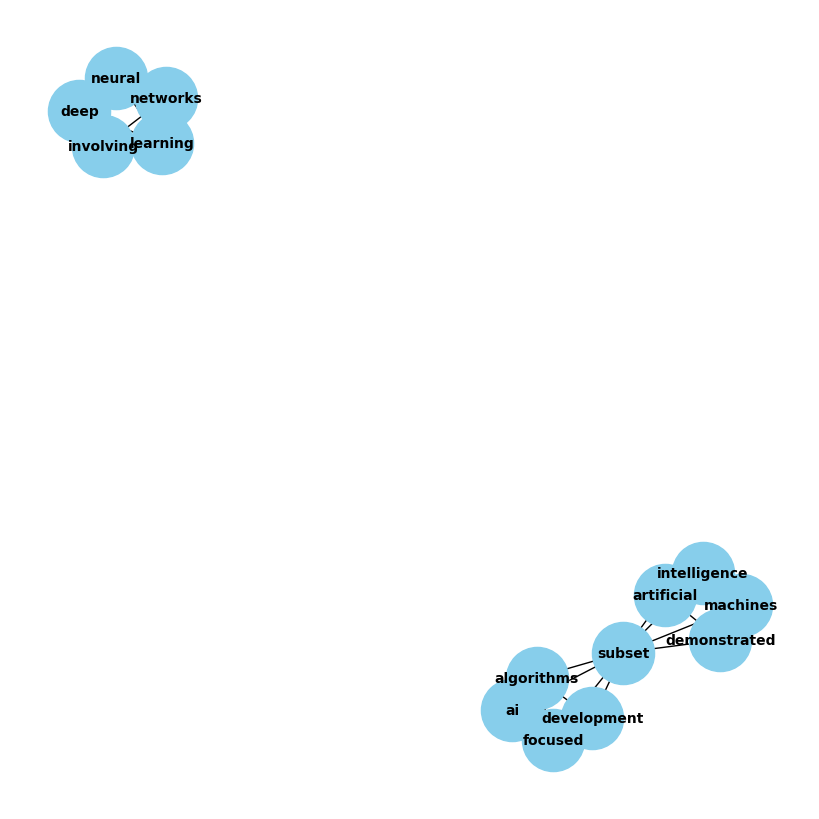

In [13]:
build_knowledge_graph(relationships)

In [14]:
# Example usage

from neo4j import GraphDatabase
import os

neo4j_uri = os.getenv("NEO4J_URI", "bolt://neo4j:7687")
neo4j_user = os.getenv("NEO4J_USER", "neo4j")
neo4j_password = os.getenv("NEO4J_PASSWORD", "password")

# Example usage
kg = KnowledgeGraphNeo4j(neo4j_uri, "neo4j", "password")

for keyword, related_keywords in relationships.items():
    kg.create_node_and_relationships(keyword, related_keywords)

kg.close()

In [15]:
from neo4j import GraphDatabase
import os

# Use the service name defined in docker-compose.yml instead of localhost
neo4j_uri = os.getenv("NEO4J_URI", "bolt://neo4j:7687")  # Use "neo4j" instead of "localhost"
neo4j_user = os.getenv("NEO4J_USER", "neo4j")
neo4j_password = os.getenv("NEO4J_PASSWORD", "password")

# Initialize the driver
driver = GraphDatabase.driver(neo4j_uri, auth=(neo4j_user, neo4j_password))

# Create a session and run a test query
with driver.session() as session:
    result = session.run("MATCH (n) RETURN n LIMIT 5")
    for record in result:
        print(record)

<Record n=<Node element_id='0' labels=frozenset({'Keyword'}) properties={'name': 'intelligence'}>>
<Record n=<Node element_id='1' labels=frozenset({'Keyword'}) properties={'name': 'machines'}>>
<Record n=<Node element_id='2' labels=frozenset({'Keyword'}) properties={'name': 'demonstrated'}>>
<Record n=<Node element_id='3' labels=frozenset({'Keyword'}) properties={'name': 'artificial'}>>
<Record n=<Node element_id='4' labels=frozenset({'Keyword'}) properties={'name': 'subset'}>>
